In [33]:
%matplotlib inline

import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

In [34]:
def generate_time_series(start, end, num_series):
    date_range = pd.date_range(start=start, end=end)
    data = np.random.rand(len(date_range), num_series)
    df = pd.DataFrame(data, index=date_range)
    df.columns = [f'feature_{i}' for i in range(len(df.columns))]
    df.index.name = 'date'
    return df

In [35]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31)
num_series = 100

In [36]:
df = generate_time_series(start_date, end_date, num_series)
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.230064,0.298309,0.026461,0.352971,0.787984,0.236830,0.200567,0.022306,0.522646,0.325478,...,0.477213,0.647628,0.079673,0.877152,0.635470,0.081089,0.344316,0.632461,0.062869,0.894059
2020-01-02,0.590477,0.969766,0.107135,0.187619,0.236049,0.742599,0.216966,0.456342,0.051464,0.671744,...,0.979166,0.384572,0.881475,0.148613,0.825972,0.322027,0.795209,0.011072,0.325615,0.936328
2020-01-03,0.244795,0.766862,0.854270,0.725304,0.808200,0.661870,0.222938,0.008888,0.009160,0.376869,...,0.639731,0.538351,0.892027,0.185307,0.390202,0.881055,0.265568,0.217872,0.377982,0.065706
2020-01-04,0.541435,0.768970,0.633924,0.445074,0.597231,0.017472,0.029286,0.453714,0.110116,0.047243,...,0.259681,0.933512,0.400746,0.593166,0.574897,0.110091,0.808522,0.410282,0.946687,0.904810
2020-01-05,0.010601,0.621923,0.942591,0.818613,0.691415,0.573405,0.619317,0.327615,0.656530,0.201423,...,0.393352,0.809926,0.777162,0.656649,0.642382,0.337861,0.833963,0.877390,0.444668,0.926138


In [37]:
df['target'] = [1 if i > 0.4 else 0 for i in df['feature_0']] 

In [38]:
X = df.drop(columns=['target']).values
y = df['target'].values

In [45]:
def mutual_info_class(df:pd.DataFrame, target:str, plot=False):
    
    # Define X and y
    X = df.drop(columns=[target]).values
    y = df[target].values
    
    # Run Mutual Information for classification
    mi = mutual_info_classif(X,y)

    # Compile results in pd.DataFrame
    res = pd.DataFrame(mi, index=df.drop(columns=[target]).columns, columns=[target])

    # If plotting is enabled, plot MI data with normalized values (divided by sum)
    if plot:
        'make sure to adjust the plot size over here, in case you cannot see all of the features of the plot'
        fig, ax= plt.subplots(figsize=(4, 40))
        sns.heatmap(res.div(res.sum()), ax=ax, cmap='Blues')

    return res

,target
feature_0,0.674128
feature_1,0.000000
feature_2,0.000000
feature_3,0.000000
feature_4,0.038953
...,...
feature_95,0.049877
feature_96,0.048317
feature_97,0.000000
feature_98,0.000000


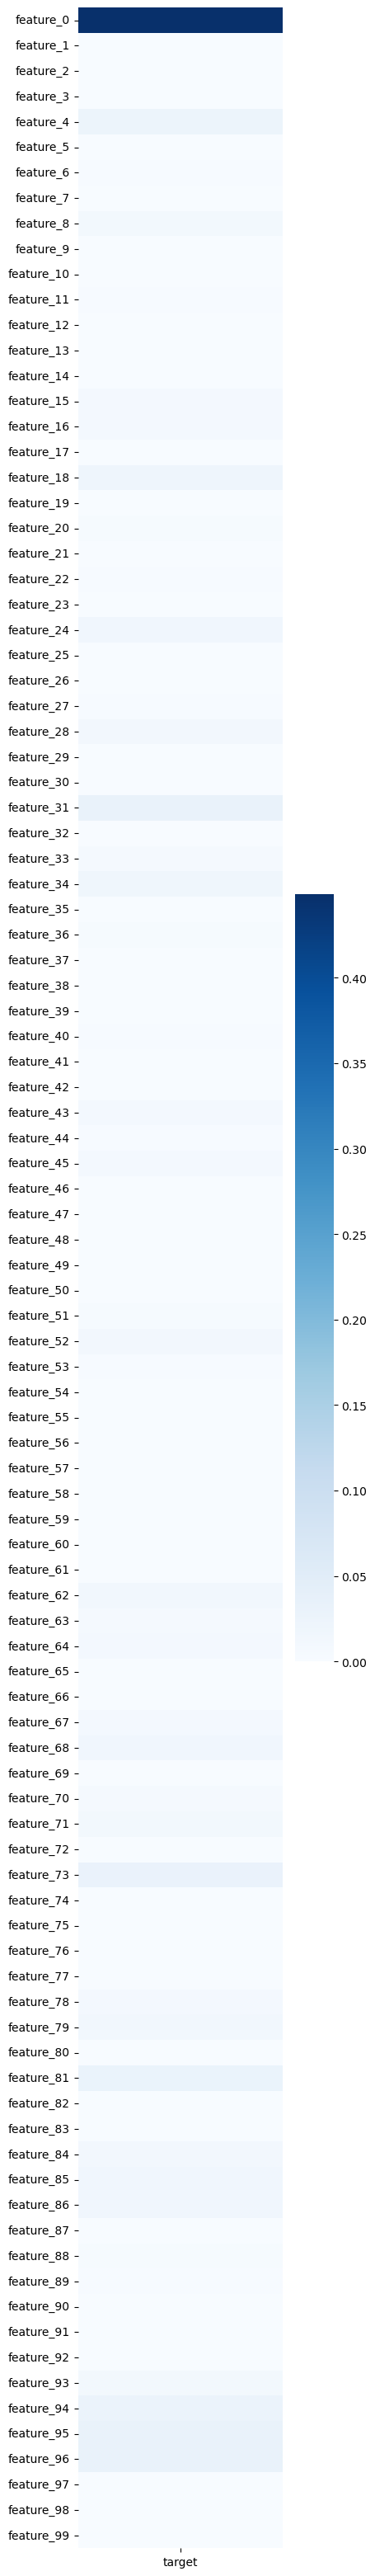

In [46]:
mutual_info_class(df, target='target', plot=True)